<a href="https://colab.research.google.com/github/sayakpaul/big_vision_experiments/blob/main/notebooks/analyze-metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -q https://github.com/sayakpaul/big_vision_experiments/releases/download/v0.1.0/vit_s16_1k.zip
!unzip -qq vit_s16_1k.zip

In [2]:
import json
import matplotlib.pyplot as plt

In [4]:
with open("/content/vit_s16_1k/big_vision_metrics.txt", "r") as f:
    contents = f.readlines()

In [ ]:
contents = list(map(json.loads, contents))
contents[0]

{'epoch': 0.0008073449468011716,
 'examples_seen': 1024.0,
 'global_schedule': 0.0,
 'l2_grads': 0.40125396847724915,
 'l2_params': 208.7072296142578,
 'l2_updates': 0.0,
 'minival/loss': 6.907752993104609,
 'minival/prec@1': 0.0006244146113019045,
 'real/loss': 8.488201821026244,
 'real/prec@1': 0.0011102333625125436,
 'step': 1,
 'training_loss': 6.907747745513916,
 'v2/loss': 6.907753125,
 'v2/prec@1': 0.001,
 'val/loss': 6.9077530078125,
 'val/prec@1': 0.001}

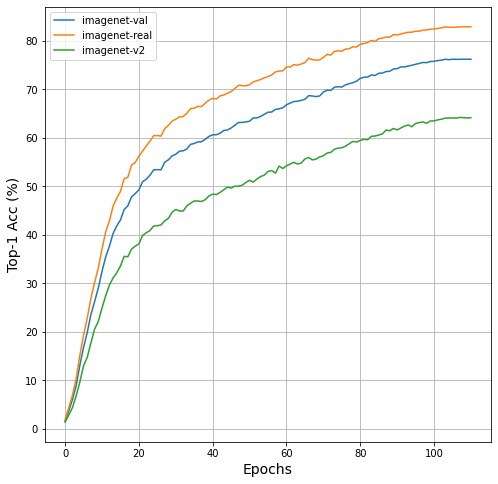

In [ ]:
all_val_accuracies = []
all_real_accuracies = []
all_v2_accuracies = []

for content in contents:
    if content["step"] % 1000 == 0:
        all_val_accuracies.append(round(content.get("val/prec@1", 0.) * 100, 2))
        all_real_accuracies.append(round(content.get("real/prec@1", 0.) * 100, 2))
        all_v2_accuracies.append(round(content.get("v2/prec@1", 0.) * 100, 2))


plt.figure(figsize=(8, 8))
plt.plot(all_val_accuracies, label="imagenet-val")
plt.plot(all_real_accuracies, label="imagenet-real")
plt.plot(all_v2_accuracies, label="imagenet-v2")

plt.grid()
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Top-1 Acc (%)", fontsize=14)

plt.legend()
plt.savefig("imagenet1k_s16.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
all_val_accuracies[-1]

76.23